# Atividade 08 - Otimização Multi Objetivo: Métodos Clássicos
- 202108075 – ANDRÉ LUIS ARAÚJO DE SOUZA<br>
- 202105848 – HUGO FERNANDES SILVA<br>
- 202105854 – LUCAS BRANDÃO RODRIGUES<br>
- 202105858 – MARCELO HENRIQUE LOPES FERREIRA<br>
- 202105865 – RAFAEL ALVES GOIAS<br>

# Otimização Multiobjetivo

## Com base no material de Luis Martí, [IC](http://www.ic.uff.br)/[UFF](http://www.uff.br)


# Neste notebook

* Present the basic concepts related to evolutionary multi-objective optimization algorithms.
* The Non-dominated Sorting Genetic Algorithm II (NSGA-II).
* Benchmark test problems.
* Experiment design and results comparison.


## Como podemos lidar com vários objetivos conflitantes?

Até mesmo escolher uma fruta implica lidar com objetivos conflitantes.

<div align='center'><img src='http://imgs.xkcd.com/comics/fuck_grapefruit.png' width='56%' align='center'/>
taken from http://xkcd.com/388/</div>

# [Otimização multiobjetivo](http://en.wikipedia.org/wiki/Multi-objective_optimization)

* A maioria dos problemas de otimização -*se não todos*- envolvem mais de uma função objetivo a ser otimizada simultaneamente.
* Por exemplo, você deve otimizar um determinado recurso de um objeto mantendo sob controle os recursos necessários para elaborar esse objeto.
* Às vezes, esses outros objetivos são convertidos em restrições ou fixados em valores padrão, mas isso não significa que eles estejam lá.
* A otimização multiobjetivo também é conhecida como *programação multiobjetivo*, *otimização vetorial*, *otimização multicritério*, *otimização multiatributo* ou *otimização de Pareto* (e provavelmente por outros nomes, dependendo do campo).
* A otimização multiobjetivo foi aplicada em [muitos campos da ciência](http://en.wikipedia.org/wiki/Multi-objective_optimization#Examples_of_multi-objective_optimization_applications), incluindo engenharia, economia e logística (consulte a seção sobre aplicativos para exemplos detalhados) onde decisões ótimas precisam ser tomadas na presença de trade-offs entre dois ou mais objetivos conflitantes.

## Um problema de otimização multiobjetivo (MOP)

$$
\renewcommand{\vec}[1]{\mathbf{#1}}
\newcommand{\set}[1]{\mathcal{#1}}
\newcommand{\dom}{\preccurlyeq}
\left.
\begin{array}{rl}
\mathrm{minimize}             & \vec{F}(\vec{x})=\langle f_1(\vec{x}),\ldots,f_M(\vec{x})\rangle\,,\\
\mathrm{subject}\ \mathrm{to} & c_1(\vec{x}),\ldots,c_C(\vec{x})\le 0\,,\\
							  & d_1(\vec{x}),\ldots,d_D(\vec{x})= 0\,,\\
& \text{with}\ \vec{x}\in\set{D}\,,
\end{array}\right\}
$$

* $\mathcal{D}$ é conhecido como *conjunto de decisão* ou *espaço de busca*.
* funções $f_1(\mathbf{x}),\ldots,f_M(\mathbf{x})$ são as *funções objetivo*. Se $M=1$ o problema reduz para um problema de otimização mono-objetivo.
* Conjunto imagem, $\set{O}$, resultado da projeção do conjunto $\set{D}$ via $f_1(\vec{x}),\ldots,f_M(\vec{x})$ é chamado de *espaço dos objetivos* ($\vec{F}:\set{D}\rightarrow\set{O}$).
* $c_1(\vec{x}),\ldots,c_C(\vec{x})\le 0$ e $d_1(\vec{x}),\ldots,d_D(\vec{x})= 0$  expressa as restrições impostas nos valores de $\vec{x}$.

*Nota:* Caso você ainda esteja se perguntando, um problema de maximização pode ser colocado como o de minimização: $\min\ -\vec{F}(\vec{x})$.

## MOP soluções ótimas

Normalmente, não existe uma solução única que minimize todas as funções objetivo simultaneamente, mas sim um conjunto de soluções *trade-off* igualmente boas.

* *Otimalidade* pode ser definida em termos da relação [*Dominância de Pareto*](https://en.wikipedia.org/wiki/Pareto_efficiency). Ou seja, tendo $\vec{x},\vec{y}\in\set{D}$, diz-se que $\vec{x}$ domina $\vec{y}$ (expresso como $\vec{ x}\dom\vec{y}$) se $\forall f_j$, $f_j(\vec{x})\leq f_j(\vec{y})$ e $\exists f_i$ tal que $f_i(\ vec{x})< f_i(\vec{y})$.
* Tendo o conjunto $\set{A}$. $\set{A}^\ast$, o *subconjunto não dominado* de $\set{A}$, é definido como

$$
\set{A}^\ast=\left\{ \vec{x}\in\set{A} \left|\not\exists\vec{y}\in\set{A}:\vec{y}\dom\vec{x}\right.\right\}.
$$

* O *conjunto ótimo de Pareto*, $\set{D}^{\ast}$, é a solução do problema. É o subconjunto de elementos não dominados de $\set{D}$. Também é conhecido como *conjunto eficiente*.
* Consiste em soluções que não podem ser melhoradas em nenhum dos objetivos sem degradar pelo menos um dos outros objetivos.
* Sua imagem no conjunto objetivo é chamada de *frente ótima de Pareto*, $\set{O}^\ast$.
* Algoritmos evolutivos geralmente produzem um conjunto de soluções não dominadas, $\set{P}^\ast$, que se aproximam de $\set{D}^{\ast}$.


Como de costume, precisamos de alguma inicialização e configuração.

In [1]:
!sudo apt-get install cm-super texlive-latex-extra texlive-fonts-recommended dvipng
!pip install latex
!pip install deap
# This line configures matplotlib to show figures embedded in the notebook,
# instead of opening a new window for each figure. More about that later.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript javascript-common
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libharfbuzz-icu0 libidn11
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpdfbox-java
  libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data preview-latex-style
  rake ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fon

In [2]:
import time, array, random, copy, math
import numpy as np
import pandas as pd

In [3]:
%config InlineBackend.figure_format = 'retina'
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('text', usetex=True)
# matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-15).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2019.20200218-1).
The following additional packages will be installed:
  fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-cantarell fonts-comfortaa
  fonts-croscore fonts-crosextra-caladea fonts-crosextra-carlito
  fonts-dejavu-core fonts-dejavu-extra fonts-ebgaramond fonts-ebgaramond-extra
  fonts-font-awesome fonts-freefont-otf fonts-freefont-ttf fonts-gfs-artemisia
  fonts-gfs-complutum fonts-gfs-didot fonts-gfs-neohellenic fonts-gfs-olga
  fonts-gfs-solomos fonts-go fonts-junicode fonts-linuxlibertine fonts-lobster
  fonts-lobstertwo fonts-noto-core fonts-oflb-asana-math fonts-open-sans
  fonts-roboto-unhinted fonts-sil-gentium fonts-sil-gentium-basic
  fonts-sil-gentiumplus fonts-sil-

In [4]:
from deap import algorithms, base, benchmarks, tools, creator

Definindo uma semente constante para ter sempre os mesmos resultados (e evitar surpresas nas aulas). -*você não deve fazer isso em um caso do mundo real!*

In [5]:
random.seed(a=42)

# Visualizando a relação de dominância de Pareto

* Para começar, vamos ter um exemplo visual da relação de dominância de Pareto em ação.
* Neste notebook vamos lidar com problemas de dois objetivos para simplificar a visualização.
* Portanto, podemos criar:

In [40]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", array.array, typecode='d',
               fitness=creator.FitnessMin)

## Vamos usar um problema MOP ilustrativo: Dent
$$
\begin{array}{rl}
\text{minimize} & f_1(\vec{x}),f_2(\vec{x}) \\
\text{such that} & f_1(\vec{x}) = \frac{1}{2}\left( \sqrt{1 + (x_1 + x_2)^2} + \sqrt{1 + (x_1 - x_2)^2} + x_1 -x_2\right) + d,\\
 & f_2(\vec{x}) = \frac{1}{2}\left( \sqrt{1 + (x_1 + x_2)^2} + \sqrt{1 + (x_1 - x_2)^2} - x_1 +x_2\right) + d,\\
\text{with}& d = \lambda e^{-\left(x_1-x_2\right)^2}\ (\text{generally }\lambda=0.85) \text{ and } \vec{x}\in \left[-1.5,1.5\right]^2.
\end{array}
$$

*Implementando* O problema Dent




In [11]:
def dent(individual, lbda = 0.85):
    """
    Implements the test problem Dent
    Num. variables = 2; bounds in [-1.5, 1.5]; num. objetives = 2.
    @author Cesar Revelo
    """
    d  = lbda * math.exp(-(individual[0] - individual[1]) ** 2)
    f1 = 0.5 * (math.sqrt(1 + (individual[0] + individual[1]) ** 2) + \
                math.sqrt(1 + (individual[0] - individual[1]) ** 2) + \
                individual[0] - individual[1]) + d
    f2 = 0.5 * (math.sqrt(1 + (individual[0] + individual[1]) ** 2) + \
                math.sqrt(1 + (individual[0] - individual[1]) ** 2) - \
                individual[0] + individual[1]) + d
    return f1, f2

In [44]:
BOUND_LOW, BOUND_UP = -1.5, 1.5
NDIM = 2
# toolbox.register("evaluate", lambda ind: benchmarks.dtlz2(ind, 2))
# toolbox.register("evaluate", dent)

Definindo uma função para geração uniforme e alguns parâmetros

In [13]:
toolbox = base.Toolbox()

In [45]:
def uniform(low, up, size=None):
    try:
        return [random.uniform(a, b) for a, b in zip(low, up)]
    except TypeError:
        return [random.uniform(a, b) for a, b in zip([low] * size, [up] * size)]
toolbox.register("attr_float", uniform, BOUND_LOW, BOUND_UP, NDIM)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", dent)

Criando um examplo de população distribuída como uma mesh.

In [46]:
num_samples = 50
limits = [np.arange(BOUND_LOW, BOUND_UP, (BOUND_UP - BOUND_LOW)/num_samples)] * NDIM
sample_x = np.meshgrid(*limits)

In [47]:
flat = []
for i in range(len(sample_x)):
    x_i = sample_x[i]
    flat.append(x_i.reshape(num_samples**NDIM))

In [48]:
example_pop = toolbox.population(n=num_samples**NDIM)

In [49]:
for i, ind in enumerate(example_pop):
    for j in range(len(flat)):
        ind[j] = flat[j][i]

In [50]:
fitnesses = toolbox.map(toolbox.evaluate, example_pop)
for ind, fit in zip(example_pop, fitnesses):
    ind.fitness.values = fit

Também precisamos de `a_given_individual`.

In [51]:
a_given_individual = toolbox.population(n=1)[0]
a_given_individual[0] = 0.5
a_given_individual[1] = 0.5

In [52]:
a_given_individual.fitness.values = toolbox.evaluate(a_given_individual)

Implementação da relação de dominância de Pareto entre dois indivíduos.



In [53]:
def pareto_dominance(ind1, ind2):
    not_equal = False
    for item1, item2 in zip(ind1.fitness.values, ind2.fitness.values):
        if item1 > item2:
            return False
        elif item1 < item2:
            not_equal = True
    return not_equal

*Nota:* Tenha em mente que o DEAP vem com uma relação de dominância de Pareto que provavelmente é mais eficiente que esta implementação.
```python
def pareto_dominance(x,y):
    return tools.emo.isDominated(x.fitness.values, y.fitness.values)
```

Vamos calcular o conjunto de indivíduos que são `dominados` por  `a_given_individual`, os que o dominam (seus `dominadores`) e os demais.

In [54]:
dominated = [ind for ind in example_pop if pareto_dominance(a_given_individual, ind)]
dominators = [ind for ind in example_pop if pareto_dominance(ind, a_given_individual)]
others = [ind for ind in example_pop if not ind in dominated and not ind in dominators]

In [55]:
def plot_dent():
    'Plots the points in decision and objective spaces.'
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    for ind in dominators: plt.plot(ind[0], ind[1], 'r.')
    for ind in dominated: plt.plot(ind[0], ind[1], 'g.')
    for ind in others: plt.plot(ind[0], ind[1], 'k.', ms=3)
    plt.plot(a_given_individual[0], a_given_individual[1], 'bo', ms=6);
    plt.xlabel('$x_1$');plt.ylabel('$x_2$');
    plt.title('Decision space');
    plt.subplot(1,2,2)
    for ind in dominators: plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'r.', alpha=0.7)
    for ind in dominated: plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'g.', alpha=0.7)
    for ind in others: plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'k.', alpha=0.7, ms=3)
    plt.plot(a_given_individual.fitness.values[0], a_given_individual.fitness.values[1], 'bo', ms=6);
    plt.xlabel('$f_1(\mathbf{x})$');plt.ylabel('$f_2(\mathbf{x})$');
    plt.xlim((0.5,3.6));plt.ylim((0.5,3.6));
    plt.title('Objective space');
    plt.tight_layout()

Tendo `a_given_individual` (ponto azul) podemos agora traçar aqueles que são dominados por ele (em verde), aqueles que o dominam (em vermelho) e aqueles que são incomparáveis.

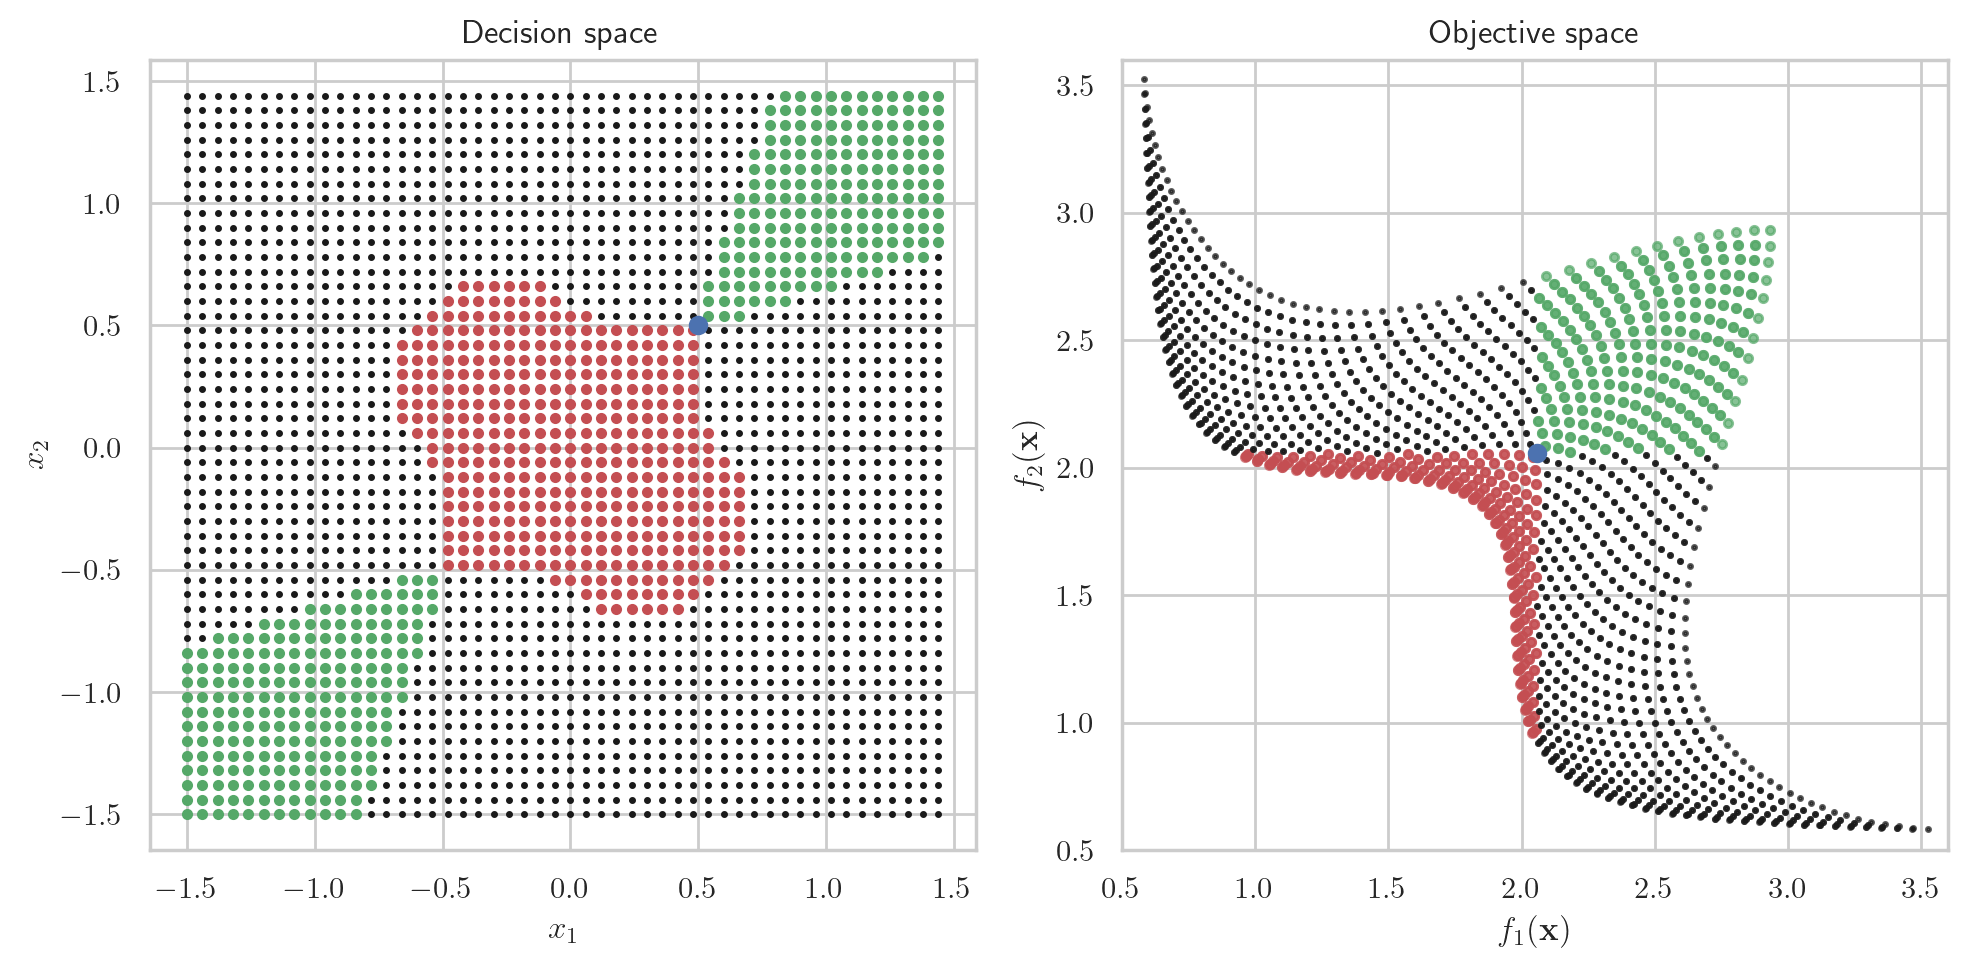

In [56]:
plot_dent()

Obtendo a fronteira de nãodominados

In [57]:
non_dom = tools.sortNondominated(example_pop, k=len(example_pop), first_front_only=True)[0]

Text(0.5, 1.0, 'Pareto-optimal front')

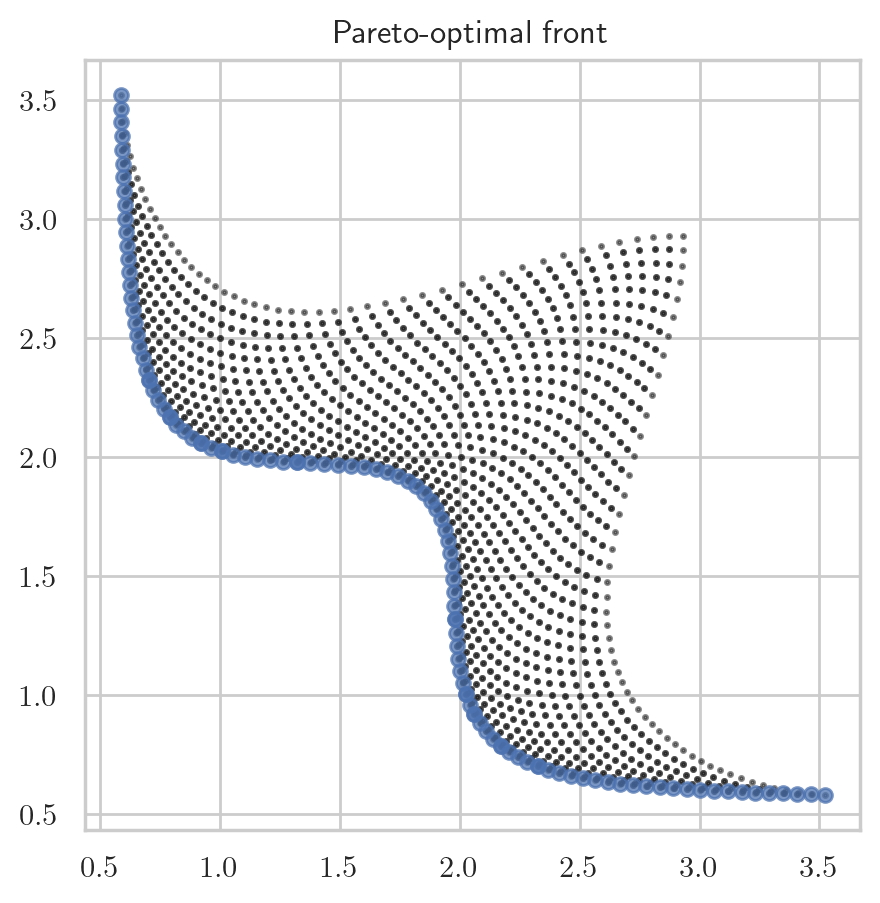

In [58]:
plt.figure(figsize=(5,5))
for ind in example_pop:
    plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'k.', ms=3, alpha=0.5)
for ind in non_dom:
    plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'bo', alpha=0.74, ms=5)
plt.title('Pareto-optimal front')

Sua tarefa agora, implemente um algoritmo genético simples para resolver o problema DENT utilizando a soma ponderada.

Para implementarmos esse algoritmo tentamos apenas mudar a maneira como as coisas estavam sendo implementadas originalmente no código. Mudamos o jeito de calcular a fitness usando a função o módulo do vetor resultante da função de dent. Também tentamos mudar o jeito que o melhor individuo era selecionado na geração usando a dominância de pareto. Infelizmente não tivemos tempo para ver se o resultado era viável pois apareceu um erro numérico no código que não conseguimos resolver.

In [78]:
# Algorithm parameters
sigma = 0.1  # Mutation step size
lambda_ = 10  # Number of offspring
iterations = 10000  # Number of iterations

# Inicialização
successes = 0
l_bound = -2
u_bound = 2
c = 0.9
x = np.random.uniform(l_bound, u_bound)  # Valor inicial de x
y = np.random.uniform(l_bound, u_bound)  # Valor inicial de y

individual = [x, y]
f1, f2 = dent(individual)  # Melhor fitness inicial

fitness = list(range(iterations))
sigmas = list(range(iterations))

# Iterations
for i in range(iterations):
    # Offspring generation
    offspring_x = [x + np.random.normal(0, sigma) for _ in range(lambda_)]
    offspring_y = [y + np.random.normal(0, sigma) for _ in range(lambda_)]


    # Evaluate fitness of offspring
    offspring_fitness = [dent(off_x, off_y) for off_x, off_y in zip(offspring_x, offspring_y)]

    # Select best offspring
    best_offspring_index = np.argmin([np.sqrt(a[0]**2 + a[1]**2)for a in offspring_fitness])
    best_offspring_fitness = offspring_fitness[best_offspring_index]
    best_offspring_x = offspring_x[best_offspring_index]
    best_offspring_y = offspring_y[best_offspring_index]

    # Update the solution
    if pareto_dominance(best_offspring_fitness, best_fitness):
        x = best_offspring_x
        y = best_offspring_y
        best_fitness = best_offspring_fitness
        successes += 1

    # Atualização do sigma com a regra de 1/5
    if i % (iterations // 5) == 0:
        success_ratio = successes / (iterations // 5)
        if success_ratio < 1/5:
            sigma /= c  # Redução do sigma
        elif success_ratio > 1/5:
            sigma *= c  # Aumento do sigma
        successes = 0  # Reiniciar o contador de sucessos

    # Armazenar os valores do fitness e sigma para visualização
    fitness[i] = best_fitness
    sigmas[i] = sigma

# Plotagem do fitness e sigma ao longo das iterações
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(range(iterations), fitness)
plt.xlabel("Iteração")
plt.ylabel("Fitness")
plt.title("Evolução do Fitness")

plt.subplot(122)
plt.plot(range(iterations), sigmas)
plt.xlabel("Iteração")
plt.ylabel("Sigma")
plt.title("Evolução do Sigma")


# Resultado
print("Melhor solução encontrada:")
print("x =", x)
print("y =", y)
print("Fitness =", best_fitness)

plt.show()

TypeError: ignored

In [34]:
def dent_weighted_sum(individual):
    f1, f2 = dent(individual)
    return 0.5*f1 + 0.5*f2,

In [35]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", dent_weighted_sum)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [36]:
def main():
    pop = toolbox.population(n=300)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 40

    # Avalia a população inteira
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    for g in range(NGEN):
        # Selecione a próxima geração de indivíduos
        offspring = toolbox.select(pop, len(pop))
        # Clone os indivíduos selecionados
        offspring = list(map(toolbox.clone, offspring))

        # Aplica crossover e mutação nos descendentes
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Avalie os indivíduos com uma função de fitness inválida
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # A população é totalmente substituída pelos descendentes
        pop[:] = offspring

    return pop

pop = main()

In [37]:
pop

[Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577538862418117, -0.6534584673347635]),
 Individual('d', [0.6577

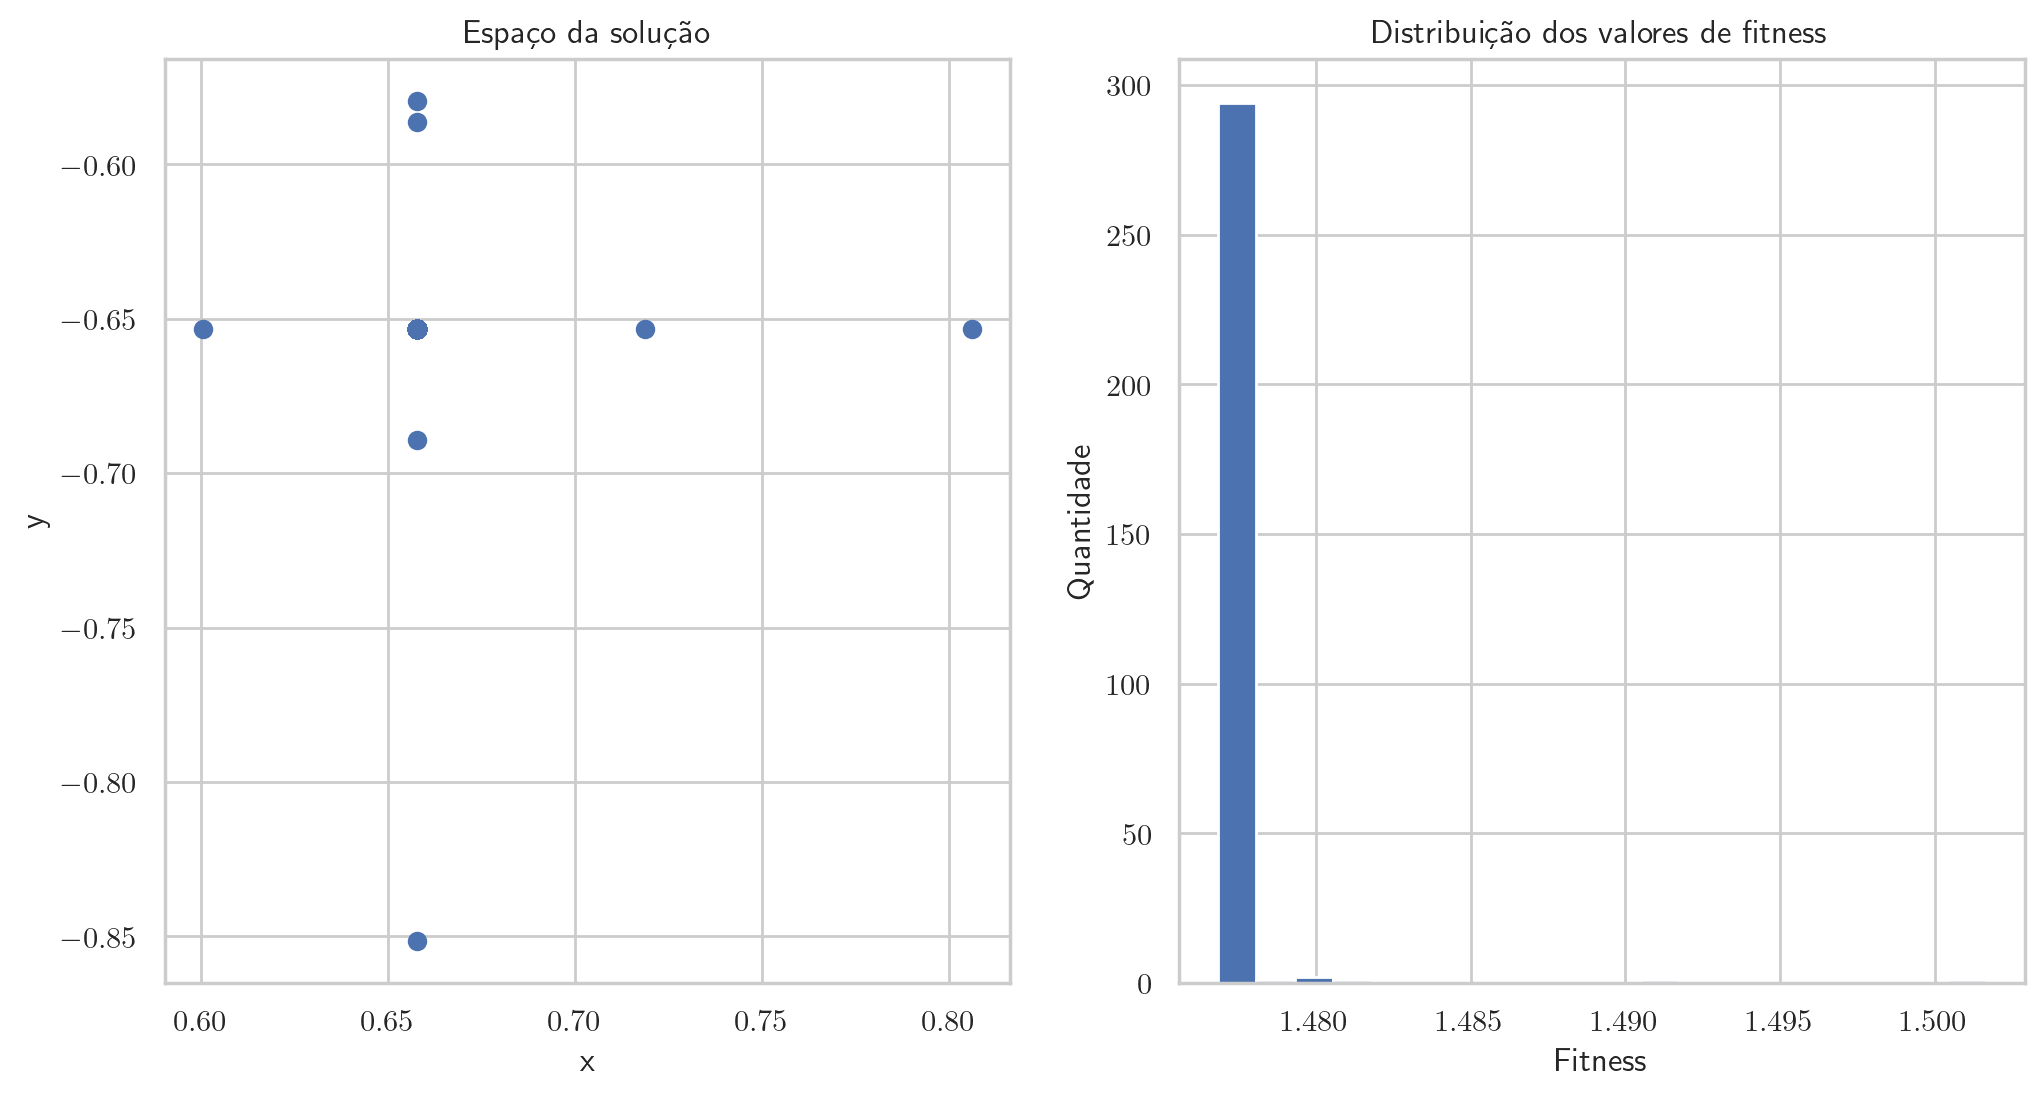

In [38]:
# Importando a biblioteca
import matplotlib.pyplot as plt

# Coleta das variáveis de decisão e valores de fitness
x = [ind[0] for ind in pop]
y = [ind[1] for ind in pop]
fitness_values = [ind.fitness.values[0] for ind in pop]

# Criação dos gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersão para as variáveis de decisão
axs[0].scatter(x, y)
axs[0].set_title('Espaço da solução')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Histograma para os valores de fitness
axs[1].hist(fitness_values, bins=20)
axs[1].set_title('Distribuição dos valores de fitness')
axs[1].set_xlabel('Fitness')
axs[1].set_ylabel('Quantidade')

plt.show()


# MOP benchmark problem toolkits

Each problem instance is meant to test the algorithms with regard with a given feature: local optima, convexity, discontinuity, bias, or a combination of them.

* [*ZDT1-6*](http://www.tik.ee.ethz.ch/sop/download/supplementary/testproblems/): Two-objective problems with a fixed number of decision variables.
     * E. Zitzler, K. Deb, and L. Thiele. Comparison of Multiobjective Evolutionary Algorithms: Empirical Results. Evolutionary Computation, 8(2):173-195, 2000. ([pdf](http://www.tik.ee.ethz.ch/sop/publicationListFiles/zdt2000a.pdf))
* [*DTLZ1-7*](http://www.tik.ee.ethz.ch/sop/download/supplementary/testproblems/): $m$-objective problems with $n$ variables.
     * K. Deb, L. Thiele, M. Laumanns and E. Zitzler. Scalable Multi-Objective Optimization Test Problems. CEC 2002, p. 825 - 830, IEEE Press, 2002. ([pdf](http://www.tik.ee.ethz.ch/sop/publicationListFiles/dtlz2002a.pdf))

* [*CEC'09*](http://dces.essex.ac.uk/staff/zhang/moeacompetition09.htm): Two- and three- objective problems that very complex Pareto sets.
    * Zhang, Q., Zhou, A., Zhao, S., & Suganthan, P. N. (2009). Multiobjective optimization test instances for the CEC 2009 special session and competition. In 2009 IEEE Congress on Evolutionary Computation (pp. 1–30). ([pdf](http://dces.essex.ac.uk/staff/zhang/MOEAcompetition/cec09testproblem0904.pdf.pdf))
* [*WFG1-9*](http://www.wfg.csse.uwa.edu.au/publications.html#toolkit): $m$-objective problems with $n$ variables, very complex.
    * Huband, S., Hingston, P., Barone, L., & While, L. (2006). A review of multiobjective test problems and a scalable test problem toolkit. IEEE Transactions on Evolutionary Computation, 10(5), 477–506. doi:10.1109/TEVC.2005.861417